# Boosting

На примерах урока мы увидели, что алгоритм XGBoost работает лучше и быстрее относительно GradientBoosting и AdaBoost. Поэтому в этом домашнем задании предлагаем посмотреть, какие еще интересные методы существуют в библиотеке для реализацией этого алгоритма.

### Важность признаков

Признаки, которые используют для обучения модели, оказывают большое влияние на ее качество. Неинформативные или слабо информативные признаки могут существенно понизить эффективность модели.

Отбор признаков – процесс выбора признаков, имеющих наиболее тесные взаимосвязи с целевой переменной. Он позволяет:
- уменьшить переобучение: чем меньше избыточных данных, тем меньше возможностей для модели принимать решения на основе «шума»
- повысить точность: чем меньше противоречивых данных, тем выше точность
- сократить время обучения: чем меньше данных, тем быстрее обучается модель

В библиотеке sckit-learn есть раздел feature_selection, который помогает автоматизировать этот процесс на основе методов статистики, линейной алгебры и некоторых специальных алгоритмов, таких как уже знакомый нам PCA - метод главных компонент.

Некоторые из таких методов реализованы в библиотеках для конкретных алгоритмов, к которым относится и xgboost.

Сгенерируем синтетические данные.

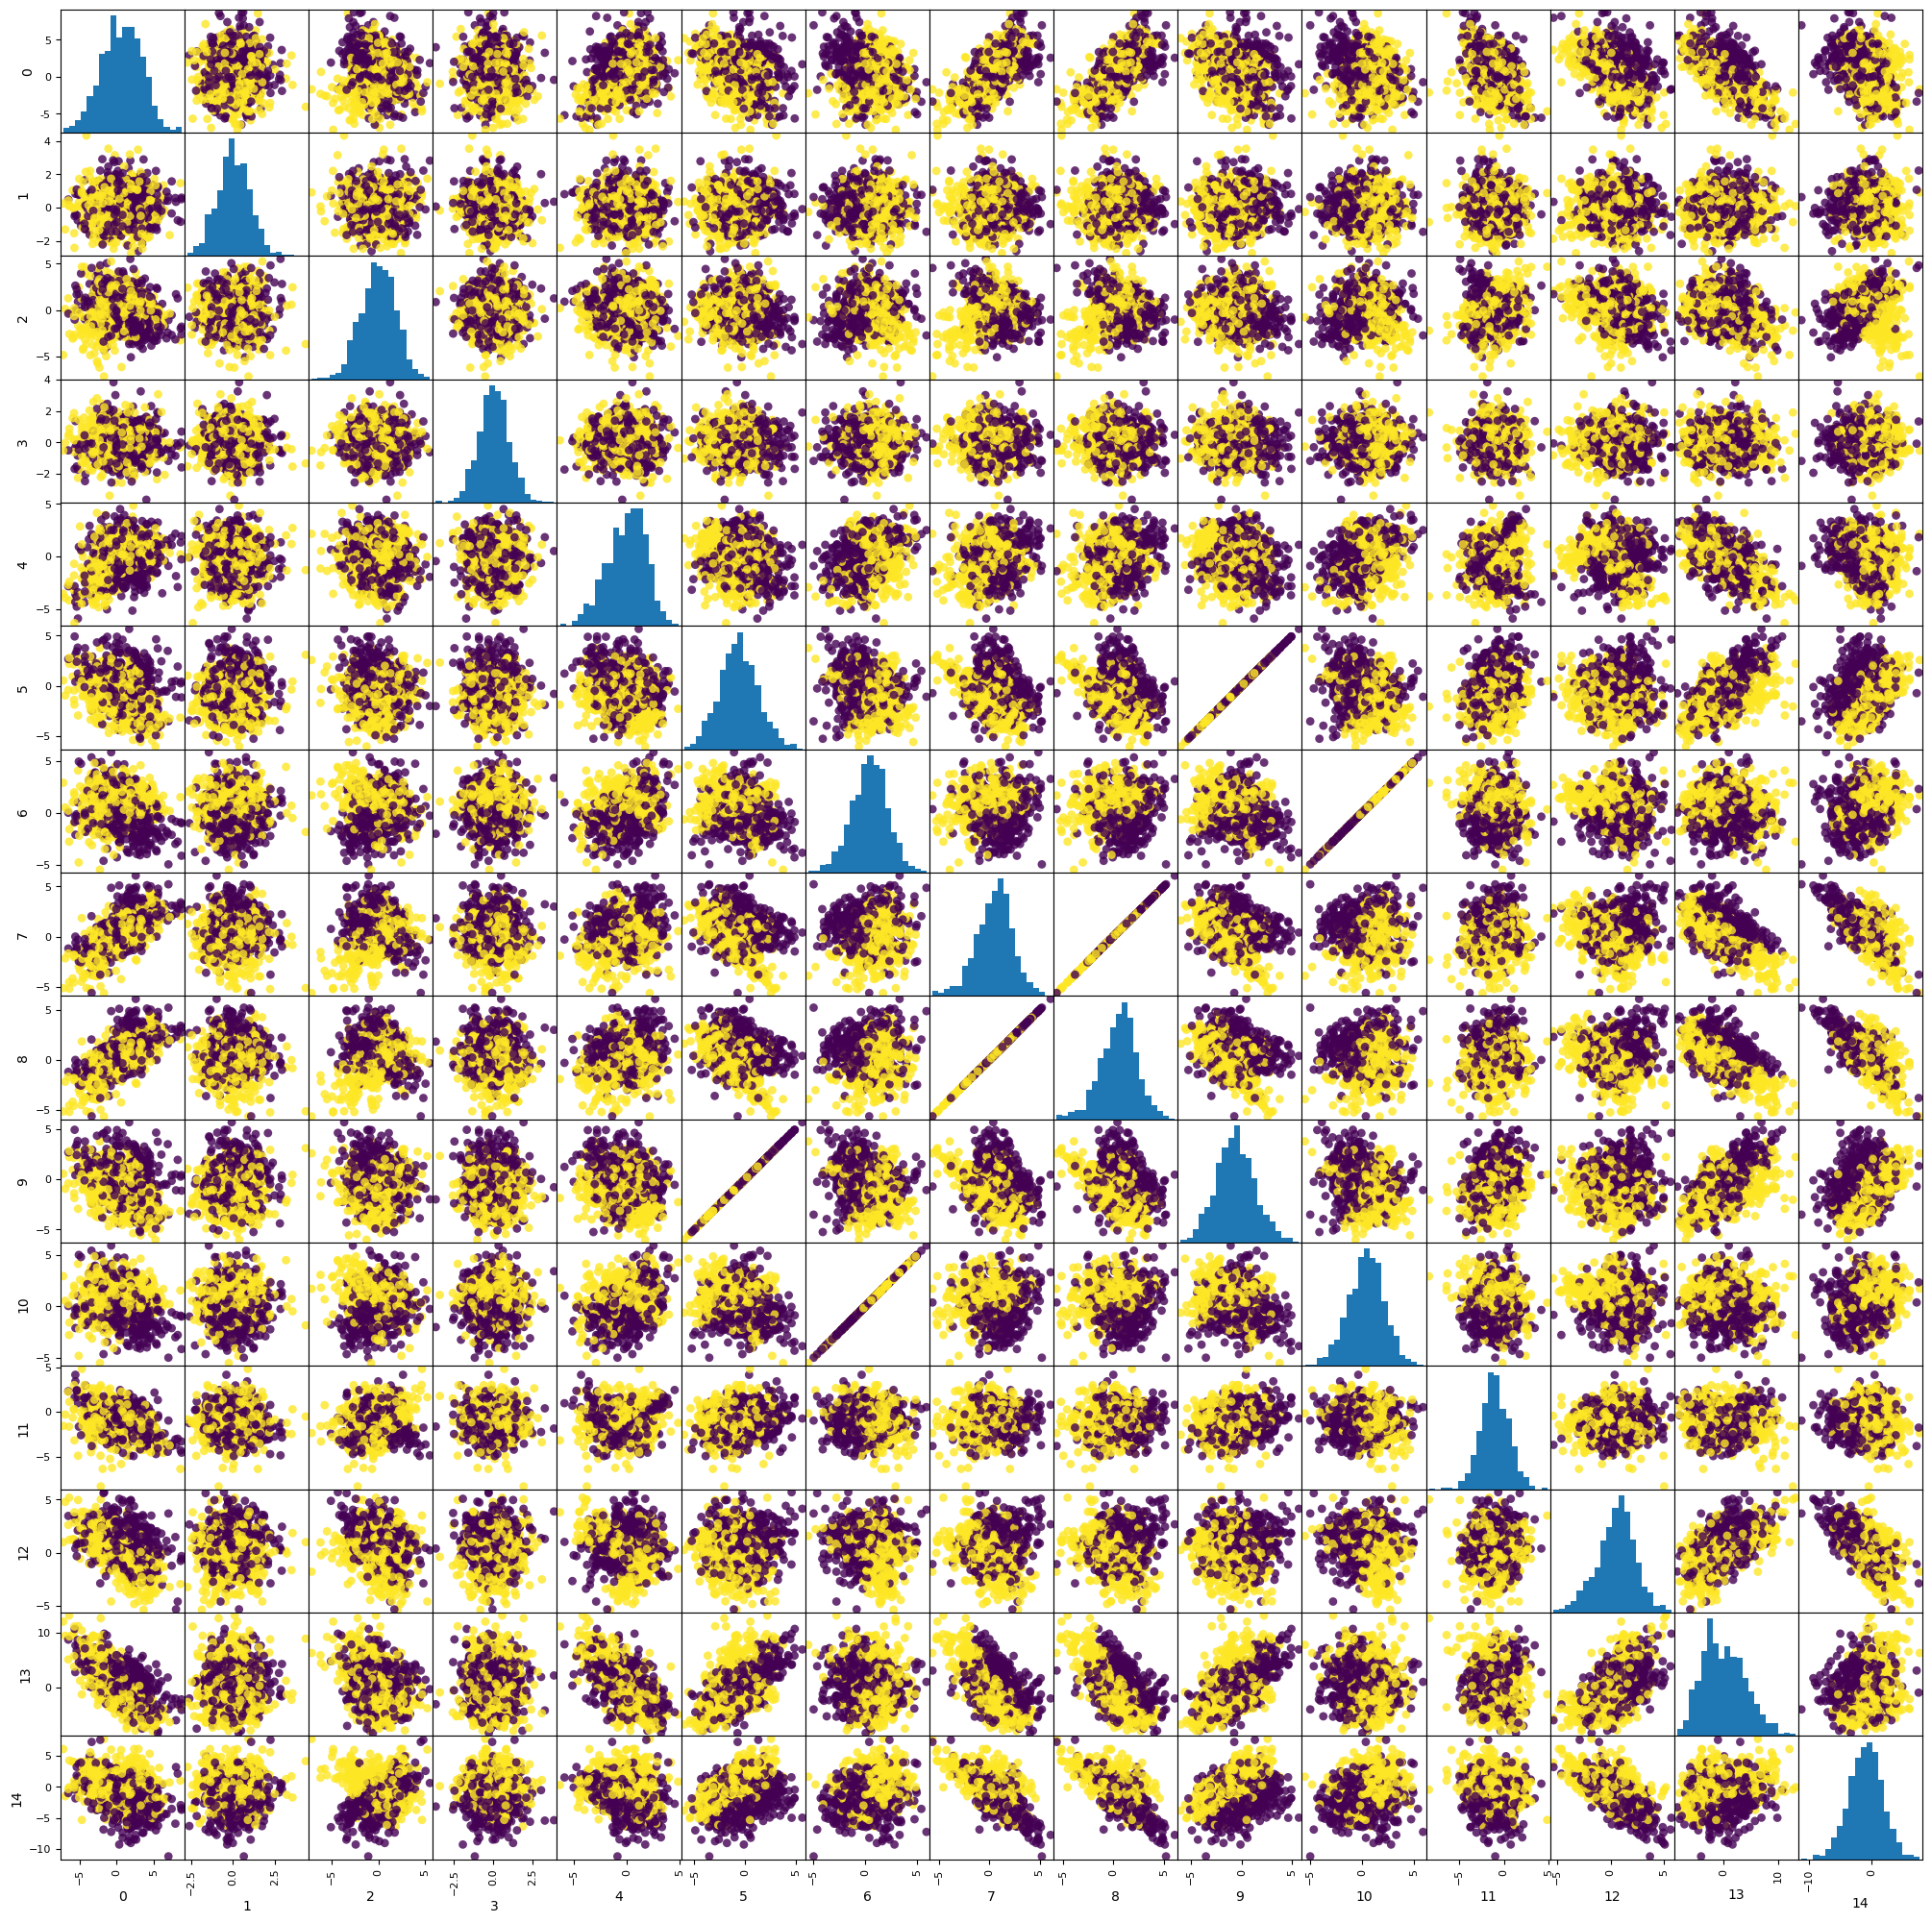

In [106]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

x, y = make_classification(n_samples=1000, n_features=15, n_informative=7,
                           n_redundant=3, n_repeated=3, random_state=17)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)

features = pd.DataFrame(x)
targets = pd.Series(y)

scat_mtrx = pd.plotting.scatter_matrix(features, c=targets, figsize=(25, 25), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

Теперь приступим к построению модели. В уроке мы разбирали алгоритм xgboost в интерфейсе библиотеки sklearn: для обучения использовали метод *fit* модели, а для предсказаний - *predict*.

Здесь будем использовать интерфейс библиотеки xgboost.

В этом интерфейсе для обучения XGBoost данные должны быть представлены в виде объекта DMatrix - внутренней структуры данных, используемой библиотекой  XGBoost, которая оптимизирована как по эффективности работы с памятью, так и по скорости обучения.

Также заранее определим параметры алгоритма:
- бинарная классификация - 'objective': 'binary:logistic'
- глубина деревьев - 'max_depth': 3
- шаг градиентного спуска (скорость обучения) - 'eta': 0.1
- количество итераций бустинга - num_rounds = 60

In [107]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}

num_rounds = 60

### 1.
С помощью метода *train* библиотеки xgboost обучите модель. Передайте в метод вышеопределенные словарь параметров, тренировочные данные в формате DMatrix и число итераций.

In [108]:
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)


### 2.
В методе *train* есть параметр *evals* - список валидационных наборов данных, для которых будут оцениваться показатели во время обучения. Они помогут нам отслеживать качество модели для каждой итерации.

Создайте список из двух кортежей (dtest, 'test') и (dtrain, 'train'). Снова определите метод train аналогично предыдущему пункту, добавив этот список в качестве параметра.

In [109]:
evals = [(dtest,'test'), (dtrain,'train')]
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds, evals=evals)

[0]	test-logloss:0.66218	train-logloss:0.65393
[1]	test-logloss:0.63720	train-logloss:0.61917
[2]	test-logloss:0.61560	train-logloss:0.59160
[3]	test-logloss:0.59857	train-logloss:0.56560
[4]	test-logloss:0.57896	train-logloss:0.54453
[5]	test-logloss:0.56461	train-logloss:0.52541
[6]	test-logloss:0.55427	train-logloss:0.50501
[7]	test-logloss:0.54510	train-logloss:0.48785
[8]	test-logloss:0.53807	train-logloss:0.47188
[9]	test-logloss:0.52503	train-logloss:0.45870
[10]	test-logloss:0.51390	train-logloss:0.44352
[11]	test-logloss:0.50625	train-logloss:0.43231
[12]	test-logloss:0.49790	train-logloss:0.42220
[13]	test-logloss:0.48893	train-logloss:0.41076
[14]	test-logloss:0.47963	train-logloss:0.40002
[15]	test-logloss:0.47573	train-logloss:0.39206
[16]	test-logloss:0.46904	train-logloss:0.38432
[17]	test-logloss:0.46636	train-logloss:0.37817
[18]	test-logloss:0.46102	train-logloss:0.37129
[19]	test-logloss:0.45686	train-logloss:0.36514
[20]	test-logloss:0.45077	train-logloss:0.35970
[2

### 3.
В качестве метрики оценки важности признаков в XGBoost используется F-score, которая вычисляется на основе того, как часто делалось разбиение по данному признаку.

Используйте метод plot_importance библиотеки XGBoost. Передайте туда в качестве параметра xgb_model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

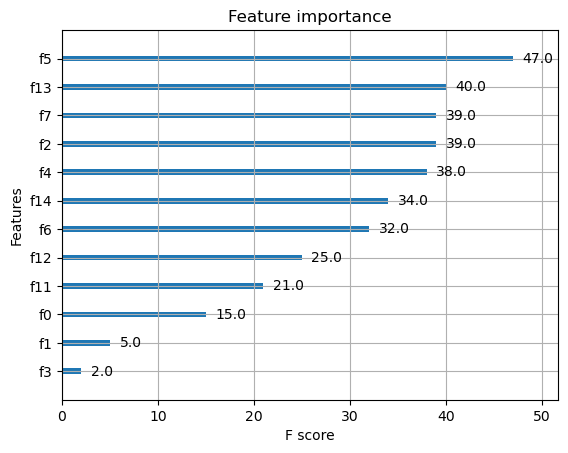

In [110]:
xgb.plot_importance(xgb_model)

По полученным данным можно посмотреть, какие признаки являются излишними и их можно убрать, а какие наиболее важны при обучении модели, т.е. используются чаще всего.

### Несбалансированные выборки

Мы уже упоминали о том, что работа с несбалансированными выборками несколько отличается от работы с идеальными датасетами. В XGBoost есть возможность несколько упростить эту работу:
- задать большие веса некоторым объектам при инициализации DMatrix
- контролировать соотношение числа объектов разных классов с помощью параметра set_pos_weight

Сгенерируем несбалансированную выборку.

In [111]:
x, y = make_classification(n_samples=1000, n_features=7, n_informative=3, n_redundant=3,
                           n_classes=2, weights=[.9, .1], random_state=20)

print(f'There are {sum(y)} positive instances\n{x},{y}')

There are 104 positive instances
[[-1.68653938  0.89053465 -1.24435446 ... -0.77423279 -2.20980467
  -0.81798946]
 [ 0.96116521  0.24635281  1.62893033 ...  1.18194139  2.87143109
   1.33618512]
 [ 0.87673661 -1.76842984 -0.27409181 ...  0.11128883 -0.8533587
  -0.36846287]
 ...
 [ 1.67382261 -1.47495568 -0.78771788 ...  0.22117656 -0.60039407
  -1.25148158]
 [-2.69027856  1.67552519 -1.50016839 ... -0.83818731 -2.77562047
  -0.82625863]
 [ 4.23981056 -3.42549294  0.5485036  ...  0.92075594  1.68746902
  -0.51425673]],[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1

### 4.
Разбейте выборку на тренировочную и тестовую, соблюдая стратификацию по *y* и размер тестового датасета 0.3. Создайте объекты DMatrix для тренировочной и тестовой выборок.

In [114]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

XD = xgb.DMatrix(x_train, y_train)
Yd = xgb.DMatrix(x_test,y_test)


Зададим параметры для алгоритма и количество итераций.

In [126]:
params1 = {'objective': 'binary:logistic',
          'max_depth': 1,
          'eta': 1}

num_rounds1 = 30

### 5.
С помощью метода train обучите модель. С помощью метода predict получите предсказания для тестовых данных. Так как алгоритм возвращает вероятности, получите бинарную матрицу значений этих вероятностей, элементы которой при полученной вероятности > 0.5 равны True, а при вероятности <= 0.5 равны False. Выведите эту матрицу.

In [132]:
import numpy as np

xgb_model1 = xgb.train(params1,XD,num_boost_round=num_rounds1)
y_pred = xgb_model1.predict(Yd)
y_pred2 = [True if i >=0.5 else False for j,i in enumerate(y_pred)]
y_pred2 = np.array(y_pred2)

### 6.
Выведите матрицу ошибок, точность и полноту для полученных предсказаний.

In [128]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [133]:
cnf_mtx = confusion_matrix(y_test,y_pred2)
pre_scr = precision_score(y_test,y_pred2)
rec_scr = recall_score(y_test,y_pred2)
print(f'matrix:\n{cnf_mtx}\nprecision: {round(pre_scr,3)}\nrecall: {(round(rec_scr,3))}')

matrix:
[[266   3]
 [ 18  13]]
precision: 0.812
recall: 0.419


Видно, что полнота гораздо ниже точности, т.е. алгоритм плохо распознает объекты класса, который представлен меньшим количеством экземпляров.

Теперь зададим вручную веса для экземпляров классов.

In [134]:
import numpy as np

weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5
weights


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.,
       1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 5., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 5., 1., 1., 1., 5., 1., 5., 1., 1., 1., 1., 1., 5., 1.,
       5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5., 1., 1., 1., 5.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.,
       1., 1., 1., 1., 1., 1., 1., 1., 5., 1., 1., 1., 1., 1., 5., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### 7.
Повторите то же, что делали ранее: создайте объекты DMatrix - для тренировочных данных укажите веса, а для тестовых оставьте только сами данные; обучите модель и получите ее предсказания так же, как и в предыдущем случае. Выведите матрицу ошибок, точность и полноту.

In [136]:
XD2 = xgb.DMatrix(x_train, y_train,weight=weights)
Yd2 = xgb.DMatrix(x_test,y_test)

xgb_model1 = xgb.train(params1,XD2,num_boost_round=num_rounds1)
y_pred3 = xgb_model1.predict(Yd2)
y_pred3 = [True if i >=0.5 else False for j,i in enumerate(y_pred3)]
y_pred3 = np.array(y_pred3)

cnf_mtx2 = confusion_matrix(y_test,y_pred3)
pre_scr2 = precision_score(y_test,y_pred3)
rec_scr2 = recall_score(y_test,y_pred3)
print(f'matrix:\n{cnf_mtx2}\nprecision: {round(pre_scr2,3)}\nrecall: {(round(rec_scr2,3))}')

matrix:
[[255  14]
 [  7  24]]
precision: 0.632
recall: 0.774


Можем увидеть, что значение полноты увеличилось, но при этом точность уменьшилась. Если нам важны обе метрики, то пригодится параметр scale_pos_weight в XGBoost.

### 8.
Снова создайте объекты DMatrix, как в первом случае (без задания весов).

In [145]:
XD3 = xgb.DMatrix(x_train, y_train)
Yd3 = xgb.DMatrix(x_test,y_test)

### 9.
Инициализируйте параметр scale_pos_weight как соотношение числа объектов двух классов. Для этого число объектов класса 0 разделите на число объектов класса 1. Добавьте в словарь параметров алгоритма params пару с ключом 'scale_pos_weight' и значением, равным полученному соотношению классов.

In [146]:
count,count2 = 0,0

for _,i in enumerate(y):
    if i == 0:
        count += 1
    else:
        count2 += 1

scale_pos = count/count2



matrix:
[[231  38]
 [  3  28]]
precision: 0.424
recall: 0.903


### 10.
Обучите модель с параметрами params и получите ее предсказания для тестовой выборки. Выведите матрицу ошибок, точность и полноту.**

In [147]:
params3 = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1,
           'scale_pos_weight': scale_pos}

xgb_model2 = xgb.train(params3,XD3)
y_pred4 = xgb_model2.predict(Yd3)
y_pred4 = [True if i >=0.5 else False for j,i in enumerate(y_pred4)]
y_pred4 = np.array(y_pred4)

cnf_mtx3 = confusion_matrix(y_test,y_pred4)
pre_scr3 = precision_score(y_test,y_pred4)
rec_scr3 = recall_score(y_test,y_pred4)
print(f'matrix:\n{cnf_mtx3}\nprecision: {round(pre_scr3,3)}\nrecall: {(round(rec_scr3,3))}')

matrix:
[[231  38]
 [  3  28]]
precision: 0.424
recall: 0.903


Значение параметра scale_pos_weight надо выбирать в зависимости от желаемого соотношения между точностью и полнотой. Например, если нам нужны примерно одинаковые значения precision и recall, в данном случае следует уменьшить полученное значение параметра в несколько раз.